In [5]:
import skia

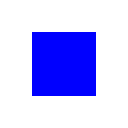

In [51]:
surface = skia.Surface(128, 128)

with surface as canvas:
    rect = skia.Rect(32, 32, 96, 96)
    paint = skia.Paint(
        Color=skia.ColorBLUE,
        Style=skia.Paint.kFill_Style)
    canvas.drawRect(rect, paint)
    #canvas.clear(skia.ColorWHITE)

surface.makeImageSnapshot()

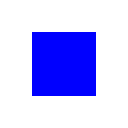

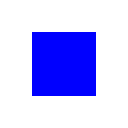

In [4]:
from IPython.display import display, Image

surface = skia.Surface(128, 128)

with surface as canvas:
    rect = skia.Rect(96, 96, 32, 32)
    paint = skia.Paint(
        Color=skia.ColorBLUE,
        Style=skia.Paint.kFill_Style)
    canvas.drawRect(rect, paint)

image = surface.makeImageSnapshot()
display(Image(data=image.encodeToData()))
    
surface = skia.Surface(128, 128)

with surface as canvas:
    rect = skia.Rect(32, 32, 96, 96)
    paint = skia.Paint(
        Color=skia.ColorBLUE,
        Style=skia.Paint.kFill_Style)
    canvas.drawRect(rect, paint)

image = surface.makeImageSnapshot()
display(Image(data=image.encodeToData()))

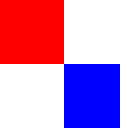

In [39]:
surface = skia.Surface(128, 128)

with surface as canvas:
    rect_blue = skia.Rect(64, 64, 120, 128)
    paint_blue = skia.Paint(
        Color=skia.ColorBLUE,
        Style=skia.Paint.kFill_Style)
    canvas.drawRect(rect_blue, paint_blue)
    
    rect_red = skia.Rect(0, 0, 64, 64)
    paint_red = skia.Paint(
        Color=skia.ColorRED,
        Style=skia.Paint.kFill_Style)
    canvas.drawRect(rect_red, paint_red)

image = surface.makeImageSnapshot()
image

In [ ]:
# x -> x + w
# y
# |
# v
# y + h

In [12]:
table = [[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 0]]

In [37]:
cell_size = 16
n_row = len(table)
n_col = len(table[0])
height = n_row * cell_size
width = n_col * cell_size
surface = skia.Surface(height, width)
print(f"Surface : height = {height} ; width = {width}")

Surface : height = 64 ; width = 48


In [34]:
def draw_one_cell(cell_size: int, row: int, col: int, color: str):
    rect = skia.Rect(col * cell_size, row * cell_size, (col+1) * cell_size, (row+1) * cell_size)
    paint = skia.Paint(
        Color=eval('skia.Color'+color.upper()),
        Style=skia.Paint.kFill_Style)
    canvas.drawRect(rect, paint)

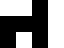

In [38]:
with surface as canvas:
    for i in range(n_row):
        for j in range(n_col):
            if table[i][j] == 1:
                draw_one_cell(cell_size=cell_size, row=i, col=j, color='black')
            else:
                draw_one_cell(cell_size=cell_size, row=i, col=j, color='white')

image = surface.makeImageSnapshot()
image

In [7]:
import contextlib, glfw, skia
from OpenGL import GL

WIDTH, HEIGHT = 640, 480

@contextlib.contextmanager
def glfw_window():
    if not glfw.init():
        raise RuntimeError('glfw.init() failed')
    glfw.window_hint(glfw.STENCIL_BITS, 8)
    window = glfw.create_window(WIDTH, HEIGHT, '', None, None)
    glfw.make_context_current(window)
    yield window
    glfw.terminate()

@contextlib.contextmanager
def skia_surface(window):
    context = skia.GrDirectContext.MakeGL()
    (fb_width, fb_height) = glfw.get_framebuffer_size(window)
    backend_render_target = skia.GrBackendRenderTarget(
        fb_width,
        fb_height,
        0,  # sampleCnt
        0,  # stencilBits
        skia.GrGLFramebufferInfo(0, GL.GL_RGBA8))
    surface = skia.Surface.MakeFromBackendRenderTarget(
        context, backend_render_target, skia.kBottomLeft_GrSurfaceOrigin,
        skia.kRGBA_8888_ColorType, skia.ColorSpace.MakeSRGB())
    assert surface is not None
    yield surface
    context.abandonContext()

In [61]:
import time

with glfw_window() as window:
    GL.glClear(GL.GL_COLOR_BUFFER_BIT)

    with skia_surface(window) as surface:
        with surface as canvas:
            canvas.drawCircle(100, 100, 40, skia.Paint(Color=skia.ColorGREEN))
        surface.flushAndSubmit()
        glfw.swap_buffers(window)
        
        time.sleep(1)
        
        with surface as canvas:
            canvas.drawCircle(200, 200, 80, skia.Paint(Color=skia.ColorGREEN))
        surface.flushAndSubmit()
        glfw.swap_buffers(window)
        
        time.sleep(1)
        
        with surface as canvas:
            canvas.clear(skia.ColorBLACK)
            rect = skia.Rect(96, 96, 32, 32)
            paint = skia.Paint(
                Color=skia.ColorBLUE,
                Style=skia.Paint.kFill_Style)
            canvas.drawRect(rect, paint)
        surface.flushAndSubmit()
        glfw.swap_buffers(window)
        
        while (glfw.get_key(window, glfw.KEY_ESCAPE) != glfw.PRESS
            and not glfw.window_should_close(window)):
            glfw.wait_events()